#Heart Disease Prediction
#Find out accuracy using ML & Deep Learning Algorithm

#Md.Ibrahim
#ID: 201-35-640

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[ Import all necessary packages in python ]

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/sample_data/Heart_Disease_Prediction.csv")

In [ ]:
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [ ]:
df.shape

(270, 14)

In [ ]:
sex = pd.isnull('Sex')

In [ ]:
print(sex)

False


In [ ]:
Chest=pd.isnull('Chest pain type')

In [ ]:
print(Chest)

False


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Length: 270, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

#Data Describe and visualization

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

Categorical columns : ['Heart Disease']


In [ ]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Numerical columns : ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


<Axes: xlabel='Age', ylabel='count'>

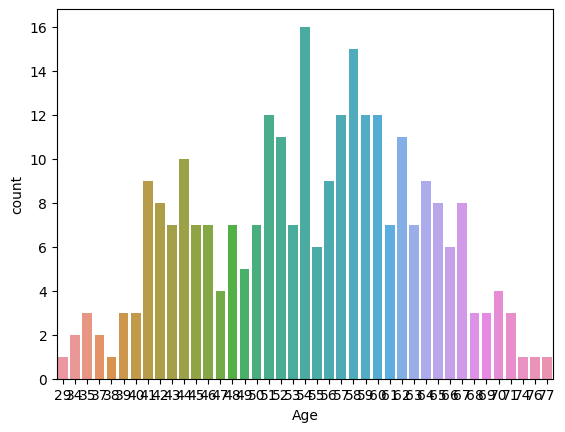

In [ ]:
import seaborn as sns
sns.countplot(x='Age', data=df)

<Axes: xlabel='Age', ylabel='count'>

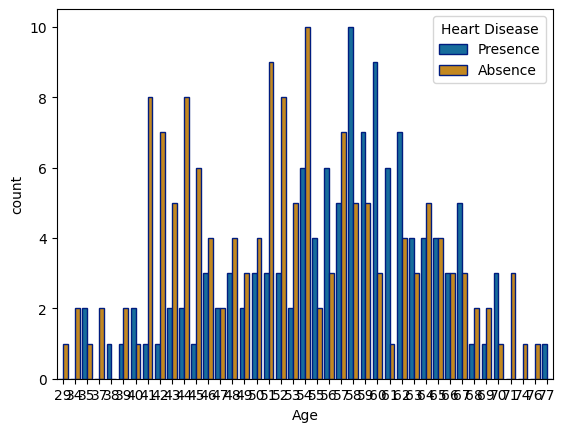

In [ ]:
sns.countplot(x='Age',hue='Heart Disease', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

<Axes: xlabel='Sex', ylabel='count'>

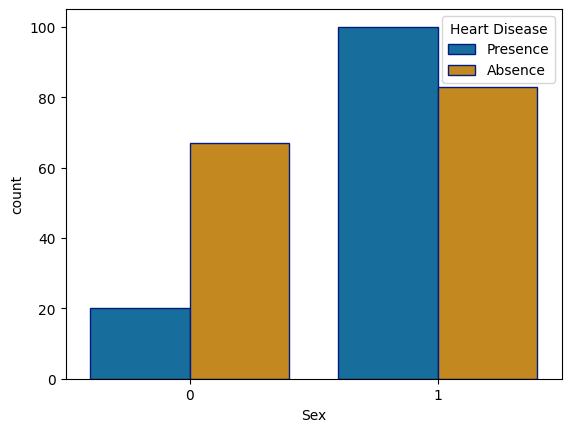

In [ ]:
sns.countplot(x='Sex',hue='Heart Disease', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

<Axes: xlabel='Cholesterol', ylabel='count'>

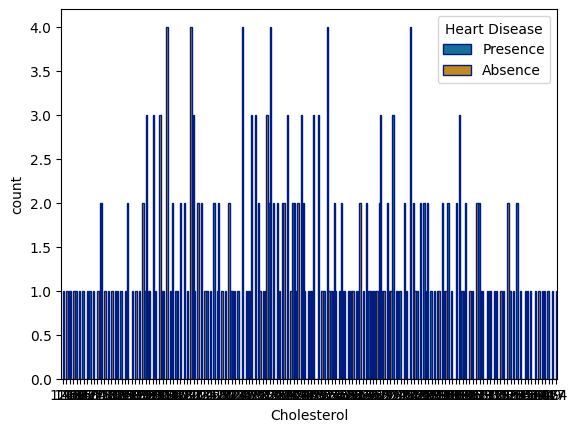

In [ ]:
sns.countplot(x='Cholesterol',hue='Heart Disease', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

<Axes: xlabel='FBS over 120', ylabel='count'>

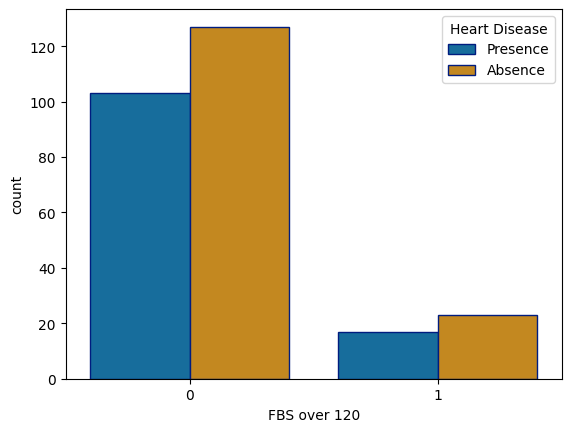

In [ ]:
sns.countplot(x='FBS over 120',hue='Heart Disease', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

#Data Preprocessing

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder=preprocessing.LabelEncoder()

In [ ]:
df['ST depression']=label_encoder.fit_transform(df['ST depression'])

In [ ]:
df['ST depression'].unique()

array([23, 16,  3,  2,  4,  6, 12, 35,  5,  0, 25, 17, 29, 14,  1, 24, 22,
       31,  9, 18, 21,  8, 10, 33, 11, 28, 19, 15, 36, 30,  7, 37, 34, 20,
       27, 26, 32, 38, 13])

In [ ]:
df['FBS over 120']=label_encoder.fit_transform(df['FBS over 120'])

In [ ]:
df['FBS over 120'].unique()

array([0, 1])

In [ ]:
df['Chest pain type']=label_encoder.fit_transform(df['Chest pain type'])
df['Chest pain type'].unique()

array([3, 2, 1, 0])

In [ ]:
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()

array([1, 0])

In [ ]:
df['Age']=label_encoder.fit_transform(df['Age'])
df['Age'].unique()

array([36, 33, 23, 30, 38, 31, 22, 25, 26, 29, 19, 10, 27, 37, 12,  6, 14,
        9, 13, 20, 17, 24, 32,  3, 16,  8, 28, 15, 18, 11,  7, 39,  5,  2,
       21,  1,  4, 35, 34, 40,  0])

In [ ]:
df['Heart Disease']=label_encoder.fit_transform(df['Heart Disease'])
df['Heart Disease'].unique()

array([1, 0])

In [ ]:
df['EKG results']=label_encoder.fit_transform(df['EKG results'])
df['EKG results'].unique()

array([2, 0, 1])

In [ ]:
df['Max HR']=label_encoder.fit_transform(df['Max HR'])
df['Max HR'].unique()

array([10, 58, 39,  7, 20, 38, 40, 68, 52, 59, 11, 77, 43, 57, 24, 19, 53,
       42, 75, 28, 78, 41, 37, 50, 55, 63, 29, 48, 36, 25, 82, 61, 76, 54,
       33, 74, 14, 80, 73, 66,  3,  6, 71, 67, 69, 12, 47, 16, 45, 46, 27,
       62,  9, 18, 49, 32, 60,  0, 23, 64, 17, 51,  1,  5, 56, 31, 70, 86,
       79, 88,  2, 65, 21, 72, 30, 44, 15,  8, 87, 83, 89, 26,  4, 34, 85,
       81, 13, 84, 22, 35])

In [ ]:
df['Number of vessels fluro']=label_encoder.fit_transform(df['Number of vessels fluro'])
df['Number of vessels fluro'].unique()

array([3, 0, 1, 2])

In [ ]:
df['Thallium']=label_encoder.fit_transform(df['Thallium'])
df['Thallium'].unique()

array([0, 2, 1])

In [ ]:
df['Slope of ST']=label_encoder.fit_transform(df['Slope of ST'])
df['Slope of ST'].unique()

array([1, 0, 2])

In [ ]:
df['Exercise angina']=label_encoder.fit_transform(df['Exercise angina'])
df['Exercise angina'].unique()

array([0, 1])

#Using Deep Learning Algorithm( Neural Network)

In [ ]:
m = tf.keras.metrics.Accuracy()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = ['Cholesterol']
y_true = ['BP']

In [ ]:
accuracy_score(y_true, y_pred, normalize=False)

0

In [ ]:

x_pred=['Max HR	']
x_true=['FBS over 120']

In [ ]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features for better trainingNew Section

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [ ]:
epochs = 100
batch_size = 45



In [ ]:
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 0.6376 - accuracy: 0.6806
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.7546
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5368 - accuracy: 0.7963
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4958 - accuracy: 0.8241
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.8287
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.8287
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8426
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3863 - accuracy: 0.8380
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8380
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8472
Epoch 11/100
5/5 [===========

# Evaluate the model on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

2/2 [==============================] - 1s 19ms/step - loss: 0.7545 - accuracy: 0.4074
Test Loss: 0.7545, Test Accuracy: 0.4074


#Using Suport vactor Machine

In [ ]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8148


#Test Accuracy is : 0.8148

#Using Logistic Regression

In [ ]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the features for better training

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

# Predict using the trained model

In [ ]:
y_pred = logreg_model.predict(X_test_scaled)


# Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9259


#Test Accuracy is : 0.9259

#Using Decision Tree Algoritham

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7160493827160493


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8518518518518519
